- 是如何知道一个网站的数据可靠的 Yahoo Finance vs CoinGecko 1.尽量可以直接下载而非用API 2.涵盖的数据要全
- API中国不能用 确实不能用
- 怎么知道cg.get_coin_market_chart_range_by_id的参数的,看库文件? help()
- coin_list.csv这个文件怎么来的，是在原有的文件上加一列attempt么 是的
- run部分 try...except...
- 为什么要用set 避免重复元素，在大的数据里面很吃香
- run部分涉及dataframe到series再从series到numpy 是的
- dataframe.values[0] [0]指返回第一行
- try仍然会报错 except里有问题

In [55]:
import time 
import os
import pandas as pd
from pycoingecko import CoinGeckoAPI
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
#注意拼写

os.getcwd()

RD = '/home/team_crypto/2022_crypto_return/02_rdata/'
WD = '/home/team_crypto/2022_crypto_return/03_wdata/1100_coingecko/'

cg = CoinGeckoAPI()

'/home/team_crypto/2022_crypto_return/01_code'

In [56]:
def to_unix_time(x):
    return int(pd.to_datetime(x).timestamp())
#将datetime转化成unix时间戳

def to_timestamp(x):
    return pd.to_datetime(x, unit='ms', origin='unix')

In [57]:
coins = pd.read_excel(f'{RD}CoinGecko Token API List.xlsx')
coins.shape
coins

(12855, 3)

,Id,Symbol,Name
0,NaN,xcre,Cresio
1,01coin,zoc,01coin
2,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
3,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
4,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token
...,...,...,...
12850,zynecoin,zyn,Zynecoin
12851,zyro,zyro,Zyro
12852,zytara-dollar,zusd,Zytara Dollar
12853,zyx,zyx,ZYX


In [58]:
coins.loc[coins['Id'] == 'litecoin']
#注意loc后接[]

,Id,Symbol,Name
6542,litecoin,ltc,Litecoin


In [59]:
s1, s2, s3, *_= coins.loc[6542, :]
#dataframe的检索必须用.loc
#.value只返回数值，axis不返回
ft, tt = to_unix_time('2014-01-01'), to_unix_time('2022-03-09')
s1, s2, s3
ft, tt
#,可以并列操作

('litecoin', 'ltc', 'Litecoin')

(1388534400, 1646784000)

In [60]:
coins.loc[6606, :]
coins.loc[6606, :].values
#.value只返回数值，axis不返回

Id        long-coin
Symbol         long
Name      LONG COIN
Name: 6606, dtype: object

array(['long-coin', 'long', 'LONG COIN'], dtype=object)

In [61]:
ret = cg.get_coin_market_chart_range_by_id(
    id = s1,
    vs_currency = 'usd',
    from_timestamp = ft,
    to_timestamp = tt,
)
len(ret['prices'])
if len(ret['prices']) == 0:
    print('No return.')
#注意if中是==

2989

In [62]:
dfs = []
#创建一个array
for var in ret.keys():
    df = pd.DataFrame(ret[var])
    df.columns = ['time', var]
    df['time'] = df['time'].map(to_timestamp)
    df.set_index('time', inplace = True)
    #print(df)
    dfs.append(df)
#dataframe.keys()返回行信息栏
#dataframe和array的区别是有横纵轴
#直接用[]索引是包含index的array，用DataFrame索引是DataFrame
#但是DataFrame创建出来的DataFrame只有数字index
#用df.columns可以依次修改index
#map函数可以不带x
#df.set_index可以将某一列作为index
#dfs.append类似于逐列粘贴但注意dfs为list
#print(dfs)
dfm = pd.concat(dfs, axis = 1)
#将Series又转化回DataFrame
dfm.shape
dfm.head()
dfm.tail()

(2989, 3)

,prices,market_caps,total_volumes
time,,,
2014-01-01,24.5913,601777194.0,8159590.0
2014-01-02,25.5234,625306506.0,17790500.0
2014-01-03,24.1440,592221947.0,25401900.0
2014-01-04,25.2298,619647471.0,12291600.0
2014-01-05,26.4831,651252321.0,23390300.0


,prices,market_caps,total_volumes
time,,,
2022-03-05,101.141079,7.056719e+09,9.670510e+08
2022-03-06,105.039944,7.327755e+09,6.277165e+08
2022-03-07,101.315268,7.070359e+09,5.814235e+08
2022-03-08,98.693859,6.886635e+09,7.516745e+08
2022-03-09,100.447017,7.009789e+09,7.174440e+08


In [63]:
dfm.values[0]

array([2.45913000e+01, 6.01777194e+08, 8.15959000e+06])

In [64]:
#ret.keys()
#dfs = []
#dataframe.keys()返回行信息栏
#ar = ret['prices']
#df = pd.DataFrame(ret['prices'])
#df.head(3)
#直接用[]索引是array，用DataFrame索引是DataFrame
#df.columns = ['time', 'prices']
#df
#df['time'] = df['time'].map(to_timestamp)
#df
#df.set_index('time', inplace = True)
#df
#dfs
#dfs.append(df)
#dfs
#dfm = pd.concat(dfs, axis = 1)
#将Series又转化回DataFrame
#dfm.shape
#dfm.head()
#dfm.tail()

In [65]:
dfm['id'] = s1
dfm['symbol'] = s2
dfm['name'] = s3
#设置相同元素的列
dfm

,prices,market_caps,total_volumes,id,symbol,name
time,,,,,,
2014-01-01,24.591300,6.017772e+08,8.159590e+06,litecoin,ltc,Litecoin
2014-01-02,25.523400,6.253065e+08,1.779050e+07,litecoin,ltc,Litecoin
2014-01-03,24.144000,5.922219e+08,2.540190e+07,litecoin,ltc,Litecoin
2014-01-04,25.229800,6.196475e+08,1.229160e+07,litecoin,ltc,Litecoin
2014-01-05,26.483100,6.512523e+08,2.339030e+07,litecoin,ltc,Litecoin
...,...,...,...,...,...,...
2022-03-05,101.141079,7.056719e+09,9.670510e+08,litecoin,ltc,Litecoin
2022-03-06,105.039944,7.327755e+09,6.277165e+08,litecoin,ltc,Litecoin
2022-03-07,101.315268,7.070359e+09,5.814235e+08,litecoin,ltc,Litecoin


In [66]:
dfm.reset_index()
#重新将index设为默认的0，1，2，3

,time,prices,market_caps,total_volumes,id,symbol,name
0,2014-01-01,24.591300,6.017772e+08,8.159590e+06,litecoin,ltc,Litecoin
1,2014-01-02,25.523400,6.253065e+08,1.779050e+07,litecoin,ltc,Litecoin
2,2014-01-03,24.144000,5.922219e+08,2.540190e+07,litecoin,ltc,Litecoin
3,2014-01-04,25.229800,6.196475e+08,1.229160e+07,litecoin,ltc,Litecoin
4,2014-01-05,26.483100,6.512523e+08,2.339030e+07,litecoin,ltc,Litecoin
...,...,...,...,...,...,...,...
2984,2022-03-05,101.141079,7.056719e+09,9.670510e+08,litecoin,ltc,Litecoin
2985,2022-03-06,105.039944,7.327755e+09,6.277165e+08,litecoin,ltc,Litecoin
2986,2022-03-07,101.315268,7.070359e+09,5.814235e+08,litecoin,ltc,Litecoin
2987,2022-03-08,98.693859,6.886635e+09,7.516745e+08,litecoin,ltc,Litecoin


time
2014-01-01     24.591300
2014-01-02     25.523400
2014-01-03     24.144000
2014-01-04     25.229800
2014-01-05     26.483100
                 ...    
2022-03-05    101.141079
2022-03-06    105.039944
2022-03-07    101.315268
2022-03-08     98.693859
2022-03-09    100.447017
Name: prices, Length: 2989, dtype: float64

<AxesSubplot:xlabel='time'>

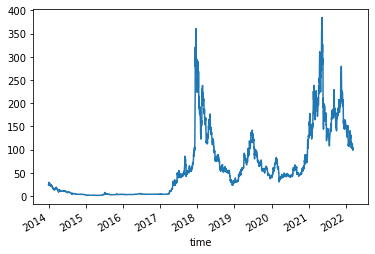

In [67]:
df = dfm.reset_index()
df.set_index('time', inplace = True)
df['prices']
df['prices'].plot()

In [68]:
coins = pd.read_csv(f'{WD}coin_list.csv')
coins.shape
coins['attempt'].value_counts()
#注意拼写dataframe[''].value_counts
coins.head()

(12980, 4)

-1    12649
-2      311
 3       19
 0        1
Name: attempt, dtype: int64

,Id,Symbol,Name,attempt
0,NaN,xcre,Cresio,0
1,01coin,zoc,01coin,-1
2,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,-1
3,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token,-1
4,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token,-1


In [69]:
#coins = pd.read_csv(f'{WD}coin_list.csv')
#coins['attempt'] = 0
#coins['attempt'].value_counts()
#coins
#coins.to_csv(f'{WD}coin_list.csv')

In [70]:
done = set([f.replace('.pd', '') for f in os.listdir(f'{WD}price') if 'pq' in f])
#set()函数将series转化成集合set,因为set后续要用
#replace(old, new)函数替换字符串
#os.listdir(f'{WD}price')将该路径的文件名输出
#done储存了没有.pd的文件名
#f只是一个字符串变量
coins.loc[coins['Id'].isin(done), 'attempt'] = -1
#isin是个逻辑运算函数，判断是否为其中的元素
todo = set(coins.loc[coins['attempt'].between(0,10), 'Id'])
#between判断是否在区间中，默认包含边界，返回一个数字index的
#loc[索引]+赋值操作
len(done)
len(todo)

12649

20

In [71]:
#todo = ['ethereum', 'ethereum-classic']  # , 'ripple', 'litecoin', 'tether'
#小范围实验

In [72]:
ft, tt = to_unix_time('2014-01-01'), to_unix_time('2022-03-09')

for idx in todo:
    time.sleep(2)
    # 免费API限制每分钟爬50次，最小间隔为1.2秒，安全起见此处设为5秒
    #time.sleep(5)延时五秒
    try:
        if not isinstance(idx, str): continue
        #isinstance判断类型是指定类型
        #try...except...识别报错
        #如果except也错则输出错误
        s1, s2, s3, _ = coins.loc[coins['Id'] == idx, :].values[0]
        #.values去除了轴返回了数值
        #_符号用来丢弃右边返回的超过s3的数据, _代表一个多余数值，*_代表多个
        print(f"正在获取{s1}……")
        
        ret = cg.get_coin_market_chart_range_by_id(
            id=s1,
            vs_currency='usd', 
            from_timestamp=ft, 
            to_timestamp=tt
        )
        #最后一个parameter不用,
        
        if len(ret['prices']) == 0:
            coins.loc[coins['Id'] == idx, 'attempt'] = -2
            #dataframe.loc(条件判断，'操作列') 操作
            continue
            #continue 命令不进行接下来的命令并回到循环最开始
            
        dfs = []
        
        for var in ret.keys():
            #dataframe.keys()将dataframe的info axis读取出来
            df = pd.DataFrame(ret[var])
            #将series转换成dataframe
            df.columns = ['time', var]
            #将info axis设置为这两个
            df['time'] = df['time'].map(to_timestamp)
            df.set_index('time', inplace=True)
            #将time这一列作为index
            dfs.append(df)
            #将df接在dfs上，且这是numpy.append
            
        dfm = pd.concat(dfs, axis=1)
        #将series转换成dataframe
        dfm['id'] = s1
        dfm['symbol'] = s2
        dfm['name'] = s3
        
        dfm.reset_index().to_parquet(f'{WD}price/{s1}.pq')
        
        coins.loc[coins['Id'] == idx, 'attempt'] = -1
        
    except:
        #检查错误最好打印出来
        val = coins.loc[coins['Id'] == idx, 'attempt'].values[0] + 1
        coins.loc[coins['Id'] == idx, 'attempt'] = val
        print(f"第{val}次获取{s1}失败……")
        
coins.to_csv(f'{WD}coin_list.csv', index=False)

正在获取tixl-new……
第4次获取tixl-new失败……
正在获取bored-ark……
第4次获取bored-ark失败……
正在获取project-dogex……
第4次获取project-dogex失败……
正在获取slink-labs……
第4次获取slink-labs失败……
正在获取yuan……
第4次获取yuan失败……
正在获取starpunk……
第4次获取starpunk失败……
正在获取duxdoge……
第4次获取duxdoge失败……
正在获取dogezoo……
第4次获取dogezoo失败……
正在获取minisports-token……
第4次获取minisports-token失败……
正在获取snap-token……
第4次获取snap-token失败……
正在获取love-coin……
第4次获取love-coin失败……
正在获取altcrusaders……
第4次获取altcrusaders失败……
正在获取kevin……
第4次获取kevin失败……
正在获取ether-kingdoms-token……
第4次获取ether-kingdoms-token失败……
正在获取fantasy-tales……
第4次获取fantasy-tales失败……
正在获取shrek……
第4次获取shrek失败……
正在获取starminer-ore-token……
第4次获取starminer-ore-token失败……
正在获取foobee……
第4次获取foobee失败……
正在获取linkflow……
第4次获取linkflow失败……
